# Objective:
The objective is to predict if the client will subscribe (yes/no) to a term deposit, by building classification model using Machine learning algorithms

### Data:
The data is related with direct marketing campaigns of a banking institution.The marketing campaigns were based on phone calls.often,more than one contact to the same client was required,in order to access if the product(bank term deposit) would be(orn not) subscribed.

In [1]:
#Import libraries
import pandas as pd
data=pd.read_csv("bank_marketing.csv")

In [2]:
data.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,0,41,services,married,unknown,no,88,yes,no,cellular,11,may,105,1,336,2,failure,no
1,1,56,technician,married,secondary,no,1938,no,yes,cellular,26,feb,229,1,192,4,success,yes
2,2,30,services,single,secondary,no,245,no,yes,cellular,8,jul,187,2,-1,0,unknown,no
3,3,34,management,single,tertiary,no,1396,yes,no,cellular,17,jul,630,1,-1,0,unknown,no
4,4,29,technician,single,secondary,no,-13,yes,no,cellular,14,may,512,3,-1,0,unknown,no


In [3]:
#missing values
data.isnull().sum()

Unnamed: 0    0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

In [4]:
#duplicate values
data.duplicated().sum()

0

In [5]:
#shape of dataframe
data.shape

(5581, 18)

In [6]:
#drop column
data=data.drop(['Unnamed: 0'],axis=1)
data.shape

(5581, 17)

In [7]:
import numpy as np
#What is the average age of the clients those who have subscribed to deposit?
import numpy as np
x=data[data['deposit']=='yes']['age']
np.average(x)

41.42677345537757

In [9]:
#5.What is the maximum number of contacts performed during the campaign for the clients who have not subscribed to deposit?
np.max(data[data['deposit']=='no']['campaign'])

63

In [10]:
#6.What is the difference between the maximum balance (in euros) for the clients who have subscribed to deposit and for the clients who have not subscribed to the deposit
x=np.max(data[data['deposit']=='no']['balance'] )
y=np.max(data[data['deposit']=='yes']['balance'] )
x-y

-24373

In [11]:
#7.What is the count of unique job levels in the data and find out how many clients are in the management level?
data['job'].value_counts()

management       1318
blue-collar       975
technician        887
admin.            661
services          452
retired           397
self-employed     206
student           182
unemployed        170
entrepreneur      160
housemaid         143
unknown            30
Name: job, dtype: int64

In [12]:
#What is the percentage split of the categories in the column “deposit”?
data['deposit'].value_counts()

no     2959
yes    2622
Name: deposit, dtype: int64

In [13]:
#no
(2959/(2959+2622)) *100

53.01917219136355

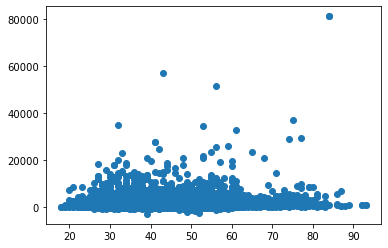

In [14]:
#scatter plot age vs balance
import matplotlib.pyplot as plt
plt.scatter(x='age',y='balance',data=data)
plt.show()
#Across all ages, most of the client’s average yearly balance is less than 20000 euros

In [15]:
#How many unemployed clients have subscribed to deposit
data[data['deposit']=='yes']['job'].value_counts()

management       669
technician       406
blue-collar      346
admin.           306
retired          255
services         189
student          129
self-employed    103
unemployed        92
housemaid         60
entrepreneur      55
unknown           12
Name: job, dtype: int64

In [16]:
#convert categorical variable to indicator variable
#pd.get_dummies(data)

In [17]:
#to get a list of unique column names excluding ‘deposit’ column
features=list(set(data.columns)-set(['deposit']))
features

['loan',
 'balance',
 'default',
 'education',
 'housing',
 'day',
 'pdays',
 'age',
 'contact',
 'month',
 'marital',
 'job',
 'campaign',
 'duration',
 'poutcome',
 'previous']

In [18]:
#The command to predict the logistic regression model ‘model’ on test dataset (test) is:
#model.predict(test)

In [19]:
#data types(categorical,numerical)
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [20]:
#convert categorical to quantitative variables
data['deposit'].replace({"no":0,"yes":1},inplace=True)
data['default'].replace({"no":0,"yes":1},inplace=True)
data['loan'].replace({"no":0,"yes":1},inplace=True)
data['housing'].replace({"no":0,"yes":1},inplace=True)
data['education'].replace({"secondary":0,"tertiary":1,"primary":2,"unknown":3},inplace=True)
data['poutcome'].replace({"unknown":0,"success":1,"failure":2,"other":3},inplace=True)
data['contact'].replace({"cellular":0,"telephone":1,"unknown":2},inplace=True)

In [22]:
data.dtypes

age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit       int64
dtype: object

In [27]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,services,married,3,0,88,1,0,0,11,may,105,1,336,2,2,0
1,56,technician,married,0,0,1938,0,1,0,26,feb,229,1,192,4,1,1
2,30,services,single,0,0,245,0,1,0,8,jul,187,2,-1,0,0,0
3,34,management,single,1,0,1396,1,0,0,17,jul,630,1,-1,0,0,0
4,29,technician,single,0,0,-13,1,0,0,14,may,512,3,-1,0,0,0


In [28]:
#remaining categorical variables are converted using get_dummies method
data=pd.get_dummies(data,drop_first=True)
data.head()

# Logistic regression

In [ ]:
X= pd.DataFrame(data.drop(['deposit'],axis=1))# all except outcome column
y= pd.DataFrame(data['deposit'])#outcome column
X=X.select_dtypes(exclude=['object'])
X.head()
y.head()

In [31]:
#Divide the dataset into two parts for training and testing in 70% and 30% proportion
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [32]:
#Create and train Logistic Regression Model on training set
from sklearn.linear_model import LogisticRegression 
#create instance 
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
output=logmodel.predict(X_test.iloc[:1,:])
output=round(output[0],2)
output


0

In [34]:
y_pred = logmodel.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [35]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7994029850746268


In [36]:
print('Accuracy : %d', (logmodel.score(X_test,y_test)))

Accuracy : %d 0.7994029850746268


### Evaluate model using Confusion Matrix

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix_value = confusion_matrix(y_test,y_pred)
print(confusion_matrix_value)

[[713 141]
 [195 626]]


In [38]:
(717+628)/(717+137+193+628)

0.8029850746268656

The test result explains there are 717+628 correct predictions and 193+628 wrong predictions

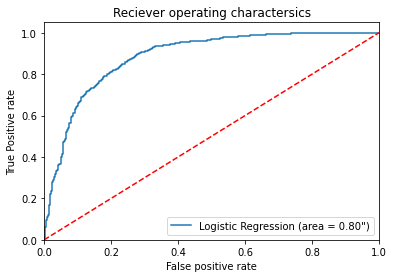

In [39]:
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
logit_roc_auc = roc_auc_score(y_test,logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test,logmodel.predict_log_proba(X_test)[:,1])
plt.figure() 
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f")' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True Positive rate')
plt.title('Reciever operating charactersics')
plt.legend(loc="lower right")
#plt.savefig('Log_Roc')
plt.show()

In [40]:
import pickle
# open a file, where you ant to store the data
file = open('telephone_model.pkl', 'wb')

# dump information to that file
pickle.dump(logmodel, file)

# KNN classifier

In [41]:
#knn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

In [44]:
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

D:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [46]:
y_pred=classifier.predict(X_test)
y_test

,deposit
1990,0
1162,0
2217,0
4972,1
2192,0
...,...
5087,0
5436,0
2803,1
4552,0


In [47]:
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
ac=accuracy_score(y_test,y_pred)
ac

0.7444776119402985

## Final output

Logistic regression : 80%
Knn classifier : 74%
so logistic regression is performing well.